In [1]:
from sklearn.datasets import load_breast_cancer
cancer=load_breast_cancer()
X=cancer.data
y=cancer.target
print('data shape:{0};positive:{1},negative:{2}'.format(X.shape,y[y==1].shape,y[y==0].shape))
print('腺癌数据的前两行为：')
print(cancer.data[0:2])

data shape:(569, 30);positive:(357,),negative:(212,)
腺癌数据的前两行为：
[[1.799e+01 1.038e+01 1.228e+02 1.001e+03 1.184e-01 2.776e-01 3.001e-01
  1.471e-01 2.419e-01 7.871e-02 1.095e+00 9.053e-01 8.589e+00 1.534e+02
  6.399e-03 4.904e-02 5.373e-02 1.587e-02 3.003e-02 6.193e-03 2.538e+01
  1.733e+01 1.846e+02 2.019e+03 1.622e-01 6.656e-01 7.119e-01 2.654e-01
  4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 1.326e+03 8.474e-02 7.864e-02 8.690e-02
  7.017e-02 1.812e-01 5.667e-02 5.435e-01 7.339e-01 3.398e+00 7.408e+01
  5.225e-03 1.308e-02 1.860e-02 1.340e-02 1.389e-02 3.532e-03 2.499e+01
  2.341e+01 1.588e+02 1.956e+03 1.238e-01 1.866e-01 2.416e-01 1.860e-01
  2.750e-01 8.902e-02]]


https://blog.csdn.net/ZhanZhan1231/article/details/103657262

In [2]:
print('腺癌特征有：')
cancer.feature_names

腺癌特征有：


array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [3]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [4]:
#模型训练
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(X_train,y_train)
train_score=model.score(X_train,y_train)
test_score=model.score(X_test,y_test)
print('train score:{0};test score{1}'.format(train_score,test_score))

train score:0.967032967032967;test score0.9210526315789473


d:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [5]:
#样本预测
import numpy as np
y_pred=model.predict(X_test)
print('预测正确的样本数/测试集总数')
print('match:{}/{}'.format(np.equal(y_pred,y_test).shape[0],y_test.shape[0]))

预测正确的样本数/测试集总数
match:114/114


In [6]:
#预测概率：找出预测概率低于0.9的样本
print('预测概率输出形式')
y_pred_proba=model.predict_proba(X_test)#计算每个测试样本的预测概率
#打印出第一个样本的数据,了解数据形式
print('sample of predict probability:{0}'.format(y_pred_proba[0]))
#打印出第一列：预测为阴性的概率大于0.1的样本，保存于result
result=y_pred_proba[y_pred_proba[:,0]>0.1]
#在result中找到第二列：预测为阳性的概率大于0.1的样本
result=result[result[:,1]>0.1]
print('所有预测概率低于0.9的样本:')
result


预测概率输出形式
sample of predict probability:[0.73278433 0.26721567]
所有预测概率低于0.9的样本:


array([[0.73278433, 0.26721567],
       [0.23914178, 0.76085822],
       [0.47722973, 0.52277027],
       [0.89951974, 0.10048026],
       [0.8308343 , 0.1691657 ],
       [0.30660844, 0.69339156],
       [0.16378859, 0.83621141],
       [0.16981182, 0.83018818],
       [0.74484218, 0.25515782],
       [0.13262807, 0.86737193],
       [0.19266273, 0.80733727],
       [0.16112179, 0.83887821],
       [0.74739596, 0.25260404],
       [0.67146944, 0.32853056],
       [0.17105909, 0.82894091],
       [0.67091304, 0.32908696],
       [0.13714472, 0.86285528],
       [0.81507239, 0.18492761]])

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
def polynomial_model(degree=1,**kwarg):
    """增加多项式特征"""
    polynomial_features=PolynomialFeatures(degree=degree,include_bias=False)
    logistic_regression=LogisticRegression(**kwarg)
    pipeline=Pipeline([(' polynomial_features', polynomial_features),( 'logistic_regression', logistic_regression)])
    return pipeline
import time
model=polynomial_model(degree=2,penalty='l1')#二阶多项式，l1范数正则化
start=time.clock()
model.fit(X_train,y_train)
train_score=model.score(X_train,y_train)
test_score=model.score(X_test,y_test)
print('polynomial_model(degree=2),elaspe:{0:.6f};train_score:{1:.6f}:test_score:{2:.6f}'.format(time.clock()-start,train_score,test_score))


        

d:\Anaconda\lib\site-packages\ipykernel_launcher.py:12: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  if sys.path[0] == '':
d:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


polynomial_model(degree=2),elaspe:0.318651;train_score:1.000000:test_score:0.947368


d:\Anaconda\lib\site-packages\ipykernel_launcher.py:16: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  app.launch_new_instance()


In [8]:
#查看特征
logistic_regression=model.named_steps['logistic_regression']
print('model_parameter_shape:{0};count of non_zero element:{1}'.format(logistic_regression.coef_.shape,np.count_nonzero(logistic_regression.coef_)))

model_parameter_shape:(1, 495);count of non_zero element:82


d:\Anaconda\lib\site-packages\ipykernel_launcher.py:30: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
d:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
d:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
d:\Anaconda\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
d:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
d:\Anaconda\lib\site-

elaspe:11.4891s


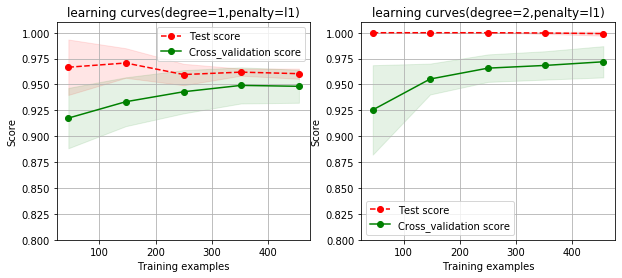

In [9]:
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from matplotlib import pyplot as plt 
%matplotlib inline
def plot_learning_curve(estimator,title,X,y,ylim=None,cv=None,n_jobs=1,train_sizes=np.linspace(.1,1.0,5)):
    """生成学习曲线"""
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel('Training examples')
    plt.ylabel('Score')
    train_sizes,train_scores,test_scores=learning_curve(estimator,X,y,cv=cv,n_jobs=n_jobs,train_sizes=train_sizes)
    train_scores_mean=np.mean(train_scores,axis=1)
    train_scores_std=np.std(train_scores,axis=1)
    test_scores_mean=np.mean(test_scores,axis=1)
    test_scores_std=np.std(test_scores,axis=1)
    plt.grid()
    
    plt.fill_between(train_sizes,train_scores_mean-train_scores_std,train_scores_mean+train_scores_std,alpha=0.1,color='r')
    plt.fill_between(train_sizes,test_scores_mean-test_scores_std,test_scores_mean+test_scores_std,alpha=0.1,color='g')
    plt.plot(train_sizes,train_scores_mean,'o--',color='r',label='Test score')
    plt.plot(train_sizes,test_scores_mean,'o-',color='g',label='Cross_validation score')
    plt.legend(loc='best')
    return plt
#使用L1范数作为正则项所对应的一阶二阶多项式学习曲线
cv=ShuffleSplit(n_splits=10,test_size=0.2,random_state=0)
title='learning curves(degree={0},penalty={1})'
degrees=[1,2]
penalty='l1'
start=time.clock()
plt.figure(figsize=(10,4))
for i in range(len(degrees)):
    plt.subplot(1,len(degrees),i+1)
    plot_learning_curve(polynomial_model(degree=degrees[i],penalty=penalty),
                        title.format(degrees[i],penalty),X,y,ylim=(0.8,1.01),cv=cv)
print('elaspe:{0:.6}s'.format(time.clock()-start))

d:\Anaconda\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  This is separate from the ipykernel package so we can avoid doing imports until
d:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
d:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
d:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
d:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.2

elaspe:2.807754s


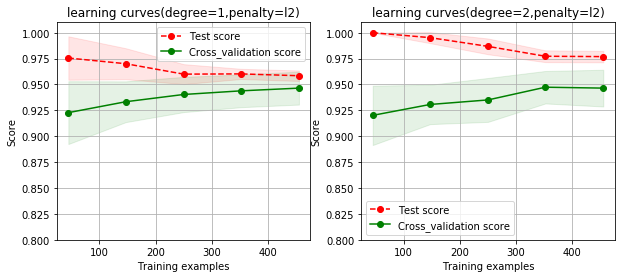

In [10]:
#使用L2范数作为正则项所对应的一阶二阶多项式学习曲线
penalty='l2'
start=time.clock()
plt.figure(figsize=(10,4))
for i in range(len(degrees)):
    plt.subplot(1,len(degrees),i+1)
    plot_learning_curve(polynomial_model(degree=degrees[i],penalty=penalty),
                        title.format(degrees[i],penalty),X,y,ylim=(0.8,1.01),cv=cv)
print('elaspe:{0:.6f}s'.format(time.clock()-start))
